## CatBoost 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pickle
input = open('data.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

Для начала необходимо выбрать оптимальное число итераций. Оно = 15.

Learning rate set to 0.5
0:	learn: 0.5716104	test: 0.5775136	best: 0.5775136 (0)	total: 4.83ms	remaining: 0us

bestTest = 0.5775135728
bestIteration = 0

Learning rate set to 0.482629
0:	learn: 0.5747498	test: 0.5805411	best: 0.5805411 (0)	total: 3.64ms	remaining: 3.64ms
1:	learn: 0.5218425	test: 0.5465501	best: 0.5465501 (1)	total: 6.69ms	remaining: 0us

bestTest = 0.5465500678
bestIteration = 1

Learning rate set to 0.404589
0:	learn: 0.5897726	test: 0.5949842	best: 0.5949842 (0)	total: 3.38ms	remaining: 6.76ms
1:	learn: 0.5389473	test: 0.5502651	best: 0.5502651 (1)	total: 6.43ms	remaining: 3.21ms
2:	learn: 0.5089383	test: 0.5292795	best: 0.5292795 (2)	total: 9.5ms	remaining: 0us

bestTest = 0.5292795209
bestIteration = 2

Learning rate set to 0.356998
0:	learn: 0.5996866	test: 0.6044808	best: 0.6044808 (0)	total: 3.59ms	remaining: 10.8ms
1:	learn: 0.5497549	test: 0.5602511	best: 0.5602511 (1)	total: 6.72ms	remaining: 6.72ms
2:	learn: 0.5190067	test: 0.5375438	best: 0.5375438 (2)	tot

9:	learn: 0.4687944	test: 0.5110479	best: 0.5110479 (9)	total: 35.2ms	remaining: 10.6ms
10:	learn: 0.4626895	test: 0.5078836	best: 0.5078836 (10)	total: 38.8ms	remaining: 7.06ms
11:	learn: 0.4570779	test: 0.5037816	best: 0.5037816 (11)	total: 42.9ms	remaining: 3.57ms
12:	learn: 0.4518974	test: 0.5002802	best: 0.5002802 (12)	total: 46.6ms	remaining: 0us

bestTest = 0.5002802408
bestIteration = 12

Learning rate set to 0.207012
0:	learn: 0.6347835	test: 0.6379298	best: 0.6379298 (0)	total: 4.48ms	remaining: 58.2ms
1:	learn: 0.5921458	test: 0.6037485	best: 0.6037485 (1)	total: 7.54ms	remaining: 45.2ms
2:	learn: 0.5627708	test: 0.5795602	best: 0.5795602 (2)	total: 10.5ms	remaining: 38.7ms
3:	learn: 0.5405662	test: 0.5642438	best: 0.5642438 (3)	total: 13.7ms	remaining: 34.4ms
4:	learn: 0.5224842	test: 0.5503337	best: 0.5503337 (4)	total: 17ms	remaining: 30.6ms
5:	learn: 0.5060125	test: 0.5403421	best: 0.5403421 (5)	total: 22.9ms	remaining: 30.6ms
6:	learn: 0.4958232	test: 0.5323865	best: 0.

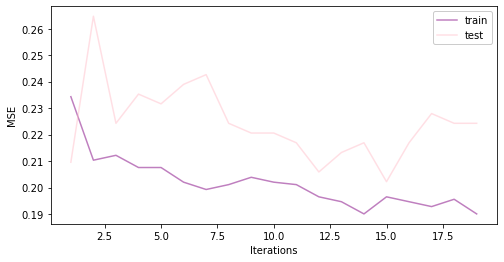

In [4]:
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error
def catboost_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=i,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test))
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='purple', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='pink', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("Iterations")
    ax.legend(framealpha=1, frameon=True);
catboost_best_n_estimator(X_train, X_test, y_train, y_test, list(range(1,20)))

Выбор глубины. У нас оптимальной является 6.

Learning rate set to 0.200892
0:	learn: 0.6478272	test: 0.6505668	best: 0.6505668 (0)	total: 948us	remaining: 13.3ms
1:	learn: 0.6228630	test: 0.6245007	best: 0.6245007 (1)	total: 1.89ms	remaining: 12.3ms
2:	learn: 0.5977816	test: 0.6041034	best: 0.6041034 (2)	total: 2.88ms	remaining: 11.5ms
3:	learn: 0.5793289	test: 0.5837854	best: 0.5837854 (3)	total: 5.68ms	remaining: 15.6ms
4:	learn: 0.5657868	test: 0.5708482	best: 0.5708482 (4)	total: 6.79ms	remaining: 13.6ms
5:	learn: 0.5546340	test: 0.5596211	best: 0.5596211 (5)	total: 7.76ms	remaining: 11.6ms
6:	learn: 0.5457380	test: 0.5518073	best: 0.5518073 (6)	total: 8.75ms	remaining: 10ms
7:	learn: 0.5403270	test: 0.5457716	best: 0.5457716 (7)	total: 9.82ms	remaining: 8.59ms
8:	learn: 0.5327860	test: 0.5369105	best: 0.5369105 (8)	total: 10.9ms	remaining: 7.29ms
9:	learn: 0.5280931	test: 0.5333647	best: 0.5333647 (9)	total: 12.1ms	remaining: 6.06ms
10:	learn: 0.5227593	test: 0.5295302	best: 0.5295302 (10)	total: 13.3ms	remaining: 4.82ms
11:

6:	learn: 0.4968527	test: 0.5287361	best: 0.5287361 (6)	total: 32.8ms	remaining: 37.5ms
7:	learn: 0.4857847	test: 0.5226553	best: 0.5226553 (7)	total: 37.8ms	remaining: 33.1ms
8:	learn: 0.4746194	test: 0.5209809	best: 0.5209809 (8)	total: 43.6ms	remaining: 29.1ms
9:	learn: 0.4666440	test: 0.5156837	best: 0.5156837 (9)	total: 48.8ms	remaining: 24.4ms
10:	learn: 0.4612364	test: 0.5133372	best: 0.5133372 (10)	total: 54.4ms	remaining: 19.8ms
11:	learn: 0.4550502	test: 0.5118181	best: 0.5118181 (11)	total: 60ms	remaining: 15ms
12:	learn: 0.4505907	test: 0.5101574	best: 0.5101574 (12)	total: 64.6ms	remaining: 9.94ms
13:	learn: 0.4435768	test: 0.5096656	best: 0.5096656 (13)	total: 71.2ms	remaining: 5.08ms
14:	learn: 0.4401204	test: 0.5085408	best: 0.5085408 (14)	total: 75.9ms	remaining: 0us

bestTest = 0.5085407509
bestIteration = 14

Learning rate set to 0.200892
0:	learn: 0.6367417	test: 0.6415421	best: 0.6415421 (0)	total: 8.39ms	remaining: 118ms
1:	learn: 0.5965246	test: 0.6064182	best: 0

5:	learn: 0.5133343	test: 0.5691591	best: 0.5691591 (5)	total: 1.15s	remaining: 1.73s
6:	learn: 0.4987721	test: 0.5618888	best: 0.5618888 (6)	total: 1.35s	remaining: 1.55s
7:	learn: 0.4858071	test: 0.5571813	best: 0.5571813 (7)	total: 1.55s	remaining: 1.36s
8:	learn: 0.4743369	test: 0.5532531	best: 0.5532531 (8)	total: 1.78s	remaining: 1.19s
9:	learn: 0.4620010	test: 0.5464698	best: 0.5464698 (9)	total: 1.98s	remaining: 988ms
10:	learn: 0.4508761	test: 0.5418552	best: 0.5418552 (10)	total: 2.16s	remaining: 787ms
11:	learn: 0.4412019	test: 0.5404870	best: 0.5404870 (11)	total: 2.35s	remaining: 589ms
12:	learn: 0.4328434	test: 0.5390150	best: 0.5390150 (12)	total: 2.57s	remaining: 395ms
13:	learn: 0.4249213	test: 0.5355780	best: 0.5355780 (13)	total: 2.77s	remaining: 198ms
14:	learn: 0.4183077	test: 0.5340283	best: 0.5340283 (14)	total: 2.96s	remaining: 0us

bestTest = 0.5340282574
bestIteration = 14

Learning rate set to 0.200892
0:	learn: 0.6462517	test: 0.6577672	best: 0.6577672 (0)	t

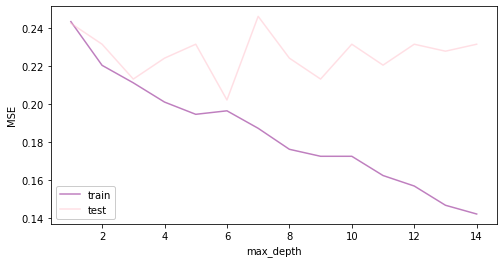

In [7]:
def catboost_max_depth(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=15,max_depth=i,random_state=10).fit(X_train,y_train,eval_set=(X_test, y_test))
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='purple', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='pink', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_depth")
    ax.legend(framealpha=1, frameon=True);

catboost_max_depth(X_train, X_test, y_train, y_test, list(range(1,15)))

Наконец-то строим модель. По качеству CatBoost такой же, как и Дерево решений.

In [12]:
cb = CatBoostClassifier(iterations=15,max_depth=6,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test))

y_pred = cb.predict(X_test)
cb.score(X_test,y_test)

Learning rate set to 0.200892
0:	learn: 0.6363422	test: 0.6394102	best: 0.6394102 (0)	total: 3.71ms	remaining: 51.9ms
1:	learn: 0.5962620	test: 0.6032259	best: 0.6032259 (1)	total: 7.87ms	remaining: 51.1ms
2:	learn: 0.5672665	test: 0.5792547	best: 0.5792547 (2)	total: 11.2ms	remaining: 45ms
3:	learn: 0.5431960	test: 0.5590350	best: 0.5590350 (3)	total: 14.1ms	remaining: 38.8ms
4:	learn: 0.5252565	test: 0.5449977	best: 0.5449977 (4)	total: 17.4ms	remaining: 34.8ms
5:	learn: 0.5089620	test: 0.5350450	best: 0.5350450 (5)	total: 21.7ms	remaining: 32.6ms
6:	learn: 0.4985262	test: 0.5266856	best: 0.5266856 (6)	total: 25.1ms	remaining: 28.6ms
7:	learn: 0.4878631	test: 0.5184242	best: 0.5184242 (7)	total: 28.3ms	remaining: 24.8ms
8:	learn: 0.4797831	test: 0.5106729	best: 0.5106729 (8)	total: 31.2ms	remaining: 20.8ms
9:	learn: 0.4733218	test: 0.5086876	best: 0.5086876 (9)	total: 34.8ms	remaining: 17.4ms
10:	learn: 0.4668969	test: 0.5042068	best: 0.5042068 (10)	total: 38ms	remaining: 13.8ms
11:	

0.7977941176470589

Посмотрим на матрицу сопряженности. Видим, что модель 217 объектов распознала верно и 55 нет. Точность модели: 79,7%. Доля ошибок: 20,3%.

In [13]:
from sklearn.metrics import confusion_matrix
cb = confusion_matrix(y_test, y_pred)
print(cb)

[[ 45  36]
 [ 19 172]]


## Вывод по классификаторам: сравнивая все модели, можем смело сказать, что имеем 2 лидера - дерево решений и CatBoost, у которых точность достигает почти 80%. Они имеют почти аналогичные матрицы сопряжённости. По сложности реализации (лично для меня) дерево решений проще, поэтому я отдаю предпочтение именно ему.  171 университет классификатор отнёс к заведениям с низким уровнем дохода, а 46 - с высоким. Стоит отметить, что другие рассмотренные модели тоже были достаточно качественными (точность около 76%). Напомню, что для классификации были использованы такие переменные, как количество студентов, количество студентов на 1 сотрудника, % женщин и мужчин и уровень преподавания.